In [ ]:
folder = "results"
validity_threshold = 1
delta_threshold = 0.3
qubits = None
min_max = "min"
outliers = True
aggregator = "mean"
first_confs = None
test_set = 0

In [104]:
csv_path = f'{folder}-grid_search_results.csv'  # Replace with your CSV filename

In [105]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid")
sns.set_palette("colorblind")
import warnings
warnings.filterwarnings('ignore')

In [106]:
# Load the grid search CSV results
_df = pd.read_csv(csv_path)
_df

,file,circuit,circuit_size,seed,backend,incremental_distance_ground,shots_incremental,iterations_incremental,incremental_distance_full,full_distance_ground,...,aposteriori_alpha,constant_next_shots_val,dma_offset,dma_window,dma_alpha,dc_offset,qc_offset,qc_window,qc_quorum_ratio,min_initial_iterations
0,"('benchmark-qpeexact', 10, 42)-50-20000-3affa6...",benchmark-qpeexact,10,42,fake_sherbrooke,0.70000,50,1,0.39620,0.62670,...,0.3,50.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1,"('benchmark-qpeexact', 10, 42)-50-20000-5733ce...",benchmark-qpeexact,10,42,fake_fez,0.44000,50,1,0.28425,0.39430,...,0.3,50.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2,"('benchmark-qpeexact', 10, 42)-50-20000-774861...",benchmark-qpeexact,10,42,fake_torino,0.48000,50,1,0.33400,0.50675,...,0.3,50.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,"('benchmark-qpeexact', 10, 42)-50-20000-f120c9...",benchmark-qpeexact,10,42,fake_marrakesh,0.40000,50,1,0.24880,0.40710,...,0.3,50.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,"('benchmark-qpeexact', 10, 42)-50-20000-fea2d0...",benchmark-qpeexact,10,42,fake_kyiv,0.68000,50,1,0.49975,0.73750,...,0.3,50.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746355,"('random-60', 8, 42)-50-20000-3affa611a3e8304e...",random-60,8,42,fake_sherbrooke,0.42530,1250,5,0.18390,0.38075,...,0.3,NaN,NaN,NaN,NaN,NaN,3.0,3.0,0.75,5.0
1746356,"('random-60', 8, 42)-50-20000-5733ce2cae0ea09b...",random-60,8,42,fake_fez,0.41100,1250,5,0.16520,0.38200,...,0.3,NaN,NaN,NaN,NaN,NaN,3.0,3.0,0.75,5.0
1746357,"('random-60', 8, 42)-50-20000-774861082a3e9a78...",random-60,8,42,fake_torino,0.42345,1250,5,0.17570,0.38300,...,0.3,NaN,NaN,NaN,NaN,NaN,3.0,3.0,0.75,5.0
1746358,"('random-60', 8, 42)-50-20000-f120c9dd86ceac0d...",random-60,8,42,fake_marrakesh,0.41540,1250,5,0.16665,0.38595,...,0.3,NaN,NaN,NaN,NaN,NaN,3.0,3.0,0.75,5.0


In [107]:
_df = _df[_df["delta_threshold"] == delta_threshold].copy()
if qubits is not None:
    if min_max == "min":
        _df = _df[_df["circuit_size"] >= qubits].copy()
    elif min_max == "max":
        _df = _df[_df["circuit_size"] < qubits].copy()
    elif min_max.startswith("+"):
        _df = _df[_df["circuit_size"] >= qubits].copy()
        _df = _df[_df["circuit_size"] < qubits + int(min_max[1:])].copy()
    else:
        raise ValueError("min_max must be either 'min' or 'max'.")
_df.describe()

,circuit_size,seed,incremental_distance_ground,shots_incremental,iterations_incremental,incremental_distance_full,full_distance_ground,shots_full,incremental_distance_aposteriori,aposteriori_distance_ground,...,aposteriori_alpha,constant_next_shots_val,dma_offset,dma_window,dma_alpha,dc_offset,qc_offset,qc_window,qc_quorum_ratio,min_initial_iterations
count,873180.000000,873180.0,873180.000000,873180.000000,873180.000000,873180.000000,873180.000000,873180.0,873180.000000,873180.000000,...,8.731800e+05,374220.000000,317520.000000,317520.000000,158760.0,79380.000000,476280.000000,476280.000000,476280.000000,498960.000000
mean,10.000000,42.0,0.632065,1509.323393,12.215505,0.411325,0.533757,20000.0,0.396305,0.579415,...,3.000000e-01,133.333333,2.000000,4.000000,0.5,2.000000,2.000000,4.000000,0.500000,2.250000
std,4.000002,0.0,0.325984,3089.274355,23.301520,0.356248,0.305638,0.0,0.332661,0.287207,...,4.996006e-16,84.983772,0.816498,1.000002,0.0,0.816502,0.816497,1.000001,0.204124,1.920288
min,4.000000,42.0,0.010000,50.000000,1.000000,0.000000,0.019050,20000.0,0.000000,0.020000,...,3.000000e-01,50.000000,1.000000,3.000000,0.5,1.000000,1.000000,3.000000,0.250000,0.000000
25%,6.000000,42.0,0.338650,150.000000,1.000000,0.086909,0.291013,20000.0,0.136923,0.388850,...,3.000000e-01,50.000000,1.000000,3.000000,0.5,1.000000,1.000000,3.000000,0.250000,0.750000
50%,10.000000,42.0,0.676400,450.000000,3.000000,0.291033,0.450175,20000.0,0.262000,0.529002,...,3.000000e-01,100.000000,2.000000,4.000000,0.5,2.000000,2.000000,4.000000,0.500000,2.000000
75%,14.000000,42.0,0.972550,1250.000000,9.000000,0.786700,0.825288,20000.0,0.717778,0.863673,...,3.000000e-01,250.000000,3.000000,5.000000,0.5,3.000000,3.000000,5.000000,0.750000,3.500000
max,16.000000,42.0,1.000000,20000.000000,203.000000,0.996600,1.000000,20000.0,0.995104,1.000000,...,3.000000e-01,250.000000,3.000000,5.000000,0.5,3.000000,3.000000,5.000000,0.750000,5.000000


In [108]:


_df["valid"] = _df['incremental_distance_full'] <= _df['delta_threshold']

_df["incremental_aposteriori_shots_diff"] = _df["shots_incremental"] - _df["shots_aposteriori"]
_df["incremental_aposteriori_distance_full_diff"] = _df["incremental_distance_full"] - _df["aposteriori_distance_full"]
_df["incremental_aposteriori_distance_ground_diff"] = _df["incremental_distance_ground"] - _df["aposteriori_distance_ground"]

_df["incremental_aposteriori_shots_diff_norm"] = _df["incremental_aposteriori_shots_diff"] / _df["shots_aposteriori"]
_df["incremental_aposteriori_distance_full_diff_norm"] = _df["incremental_aposteriori_distance_full_diff"] / _df["aposteriori_distance_full"]
_df["incremental_aposteriori_distance_ground_diff_norm"] = _df["incremental_aposteriori_distance_ground_diff"] / _df["aposteriori_distance_ground"]

_df

,file,circuit,circuit_size,seed,backend,incremental_distance_ground,shots_incremental,iterations_incremental,incremental_distance_full,full_distance_ground,...,qc_window,qc_quorum_ratio,min_initial_iterations,valid,incremental_aposteriori_shots_diff,incremental_aposteriori_distance_full_diff,incremental_aposteriori_distance_ground_diff,incremental_aposteriori_shots_diff_norm,incremental_aposteriori_distance_full_diff_norm,incremental_aposteriori_distance_ground_diff_norm
40320,"('benchmark-qpeexact', 10, 42)-50-20000-3affa6...",benchmark-qpeexact,10,42,fake_sherbrooke,0.621818,1650,33,0.104400,0.62670,...,NaN,NaN,NaN,True,1500,-0.192783,-0.031515,10.000000,-0.648702,-0.048237
40321,"('benchmark-qpeexact', 10, 42)-50-20000-5733ce...",benchmark-qpeexact,10,42,fake_fez,0.386316,950,19,0.082013,0.39430,...,NaN,NaN,NaN,True,900,-0.202237,-0.053684,18.000000,-0.711475,-0.122010
40322,"('benchmark-qpeexact', 10, 42)-50-20000-774861...",benchmark-qpeexact,10,42,fake_torino,0.501600,1250,25,0.090250,0.50675,...,NaN,NaN,NaN,True,1150,-0.207450,0.061600,11.500000,-0.696842,0.140000
40323,"('benchmark-qpeexact', 10, 42)-50-20000-f120c9...",benchmark-qpeexact,10,42,fake_marrakesh,0.402609,1150,23,0.071822,0.40710,...,NaN,NaN,NaN,True,1100,-0.176978,0.002609,22.000000,-0.711327,0.006522
40324,"('benchmark-qpeexact', 10, 42)-50-20000-fea2d0...",benchmark-qpeexact,10,42,fake_kyiv,0.729767,2150,43,0.122873,0.73750,...,NaN,NaN,NaN,True,1850,-0.161327,0.026434,6.166667,-0.567652,0.037584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1746355,"('random-60', 8, 42)-50-20000-3affa611a3e8304e...",random-60,8,42,fake_sherbrooke,0.425300,1250,5,0.183900,0.38075,...,3.0,0.75,5.0,True,700,-0.101586,-0.045095,1.272727,-0.355836,-0.095867
1746356,"('random-60', 8, 42)-50-20000-5733ce2cae0ea09b...",random-60,8,42,fake_fez,0.411000,1250,5,0.165200,0.38200,...,3.0,0.75,5.0,True,800,-0.122283,-0.043206,1.777778,-0.425358,-0.095123
1746357,"('random-60', 8, 42)-50-20000-774861082a3e9a78...",random-60,8,42,fake_torino,0.423450,1250,5,0.175700,0.38300,...,3.0,0.75,5.0,True,750,-0.123150,-0.068050,1.500000,-0.412080,-0.138454
1746358,"('random-60', 8, 42)-50-20000-f120c9dd86ceac0d...",random-60,8,42,fake_marrakesh,0.415400,1250,5,0.166650,0.38595,...,3.0,0.75,5.0,True,800,-0.118783,-0.041172,1.777778,-0.416151,-0.090177


In [109]:
_df.columns

Index(['file', 'circuit', 'circuit_size', 'seed', 'backend',
       'incremental_distance_ground', 'shots_incremental',
       'iterations_incremental', 'incremental_distance_full',
       'full_distance_ground', 'shots_full',
       'incremental_distance_aposteriori', 'aposteriori_distance_ground',
       'aposteriori_distance_full', 'shots_aposteriori', 'default_shots',
       'next_shots_type', 'threshold', 'delta_threshold',
       'stopping_criterion_type', 'stopping_dist_func', 'stability_type',
       'stability_k', 'aposteriori_alpha', 'constant_next_shots_val',
       'dma_offset', 'dma_window', 'dma_alpha', 'dc_offset', 'qc_offset',
       'qc_window', 'qc_quorum_ratio', 'min_initial_iterations', 'valid',
       'incremental_aposteriori_shots_diff',
       'incremental_aposteriori_distance_full_diff',
       'incremental_aposteriori_distance_ground_diff',
       'incremental_aposteriori_shots_diff_norm',
       'incremental_aposteriori_distance_full_diff_norm',
       'increm

In [110]:
configurations_columns = ['default_shots',
       'next_shots_type', 'threshold',
       'stopping_criterion_type', 'stopping_dist_func', 'stability_type',
       'stability_k', 'aposteriori_alpha', 'constant_next_shots_val',
       'dma_offset', 'dma_window', 'dma_alpha', 'dc_offset', 'qc_offset',
       'qc_window', 'qc_quorum_ratio', 'min_initial_iterations', 'delta_threshold']

unique_configs = _df[configurations_columns].drop_duplicates().reset_index(drop=True)
# Add a configuration label column (e.g., 'conf_1', 'conf_2', ...)
unique_configs['conf'] = ['conf_' + str(i) for i in range(1, len(unique_configs) + 1)]

# Step 3: Merge the labels back into the filtered dataframe
_df = _df.merge(unique_configs, on=configurations_columns, how='left')

unique_configs

,default_shots,next_shots_type,threshold,stopping_criterion_type,stopping_dist_func,stability_type,stability_k,aposteriori_alpha,constant_next_shots_val,dma_offset,dma_window,dma_alpha,dc_offset,qc_offset,qc_window,qc_quorum_ratio,min_initial_iterations,delta_threshold,conf
0,50,constant,0.025,delta,tvd,constant,1,0.3,50.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,0.3,conf_1
1,50,constant,0.025,delta,tvd,constant,1,0.3,50.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.3,conf_2
2,50,constant,0.025,delta,tvd,constant,1,0.3,50.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,0.3,conf_3
3,50,constant,0.025,delta,tvd,constant,1,0.3,250.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,0.3,conf_4
4,50,constant,0.025,delta,tvd,constant,1,0.3,100.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,0.3,conf_5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,250,dynamic,0.100,quorum,tvd,constant,5,0.3,NaN,NaN,NaN,NaN,NaN,2.0,3.0,0.75,5.0,0.3,conf_6233
6233,250,dynamic,0.100,quorum,tvd,constant,5,0.3,NaN,NaN,NaN,NaN,NaN,3.0,5.0,0.50,5.0,0.3,conf_6234
6234,250,dynamic,0.100,quorum,tvd,constant,5,0.3,NaN,NaN,NaN,NaN,NaN,1.0,5.0,0.50,5.0,0.3,conf_6235
6235,250,dynamic,0.100,quorum,tvd,constant,5,0.3,NaN,NaN,NaN,NaN,NaN,3.0,5.0,0.25,5.0,0.3,conf_6236


In [111]:
def remove_outliers(df, columns_to_check):
    """Remove outliers from specified columns in a DataFrame using the IQR method."""
    mask = pd.Series([True] * len(df), index=df.index)
    for column in columns_to_check:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mask &= (df[column] >= lower_bound) & (df[column] <= upper_bound)
    return df[mask]

# Apply outlier removal
if outliers:
    _df_no_outliers = _df.copy()
else:
    _df_no_outliers = remove_outliers(_df, ["incremental_aposteriori_shots_diff_norm"])
_df_no_outliers

,file,circuit,circuit_size,seed,backend,incremental_distance_ground,shots_incremental,iterations_incremental,incremental_distance_full,full_distance_ground,...,qc_quorum_ratio,min_initial_iterations,valid,incremental_aposteriori_shots_diff,incremental_aposteriori_distance_full_diff,incremental_aposteriori_distance_ground_diff,incremental_aposteriori_shots_diff_norm,incremental_aposteriori_distance_full_diff_norm,incremental_aposteriori_distance_ground_diff_norm,conf
0,"('benchmark-qpeexact', 10, 42)-50-20000-3affa6...",benchmark-qpeexact,10,42,fake_sherbrooke,0.621818,1650,33,0.104400,0.62670,...,NaN,NaN,True,1500,-0.192783,-0.031515,10.000000,-0.648702,-0.048237,conf_1
1,"('benchmark-qpeexact', 10, 42)-50-20000-5733ce...",benchmark-qpeexact,10,42,fake_fez,0.386316,950,19,0.082013,0.39430,...,NaN,NaN,True,900,-0.202237,-0.053684,18.000000,-0.711475,-0.122010,conf_1
2,"('benchmark-qpeexact', 10, 42)-50-20000-774861...",benchmark-qpeexact,10,42,fake_torino,0.501600,1250,25,0.090250,0.50675,...,NaN,NaN,True,1150,-0.207450,0.061600,11.500000,-0.696842,0.140000,conf_1
3,"('benchmark-qpeexact', 10, 42)-50-20000-f120c9...",benchmark-qpeexact,10,42,fake_marrakesh,0.402609,1150,23,0.071822,0.40710,...,NaN,NaN,True,1100,-0.176978,0.002609,22.000000,-0.711327,0.006522,conf_1
4,"('benchmark-qpeexact', 10, 42)-50-20000-fea2d0...",benchmark-qpeexact,10,42,fake_kyiv,0.729767,2150,43,0.122873,0.73750,...,NaN,NaN,True,1850,-0.161327,0.026434,6.166667,-0.567652,0.037584,conf_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873175,"('random-60', 8, 42)-50-20000-3affa611a3e8304e...",random-60,8,42,fake_sherbrooke,0.425300,1250,5,0.183900,0.38075,...,0.75,5.0,True,700,-0.101586,-0.045095,1.272727,-0.355836,-0.095867,conf_6237
873176,"('random-60', 8, 42)-50-20000-5733ce2cae0ea09b...",random-60,8,42,fake_fez,0.411000,1250,5,0.165200,0.38200,...,0.75,5.0,True,800,-0.122283,-0.043206,1.777778,-0.425358,-0.095123,conf_6237
873177,"('random-60', 8, 42)-50-20000-774861082a3e9a78...",random-60,8,42,fake_torino,0.423450,1250,5,0.175700,0.38300,...,0.75,5.0,True,750,-0.123150,-0.068050,1.500000,-0.412080,-0.138454,conf_6237
873178,"('random-60', 8, 42)-50-20000-f120c9dd86ceac0d...",random-60,8,42,fake_marrakesh,0.415400,1250,5,0.166650,0.38595,...,0.75,5.0,True,800,-0.118783,-0.041172,1.777778,-0.416151,-0.090177,conf_6237


In [112]:
print("% of outliers removed:", 100 * (1 - len(_df_no_outliers) / len(_df)))

% of outliers removed: 0.0


In [113]:
_df.describe()

,circuit_size,seed,incremental_distance_ground,shots_incremental,iterations_incremental,incremental_distance_full,full_distance_ground,shots_full,incremental_distance_aposteriori,aposteriori_distance_ground,...,qc_offset,qc_window,qc_quorum_ratio,min_initial_iterations,incremental_aposteriori_shots_diff,incremental_aposteriori_distance_full_diff,incremental_aposteriori_distance_ground_diff,incremental_aposteriori_shots_diff_norm,incremental_aposteriori_distance_full_diff_norm,incremental_aposteriori_distance_ground_diff_norm
count,873180.000000,873180.0,873180.000000,873180.000000,873180.000000,873180.000000,873180.000000,873180.0,873180.000000,873180.000000,...,476280.000000,476280.000000,476280.000000,498960.000000,873180.000000,873180.000000,873180.000000,873180.000000,873180.000000,873180.000000
mean,10.000000,42.0,0.632065,1509.323393,12.215505,0.411325,0.533757,20000.0,0.396305,0.579415,...,2.000000,4.000000,0.500000,2.250000,-1711.033750,0.163265,0.052650,3.164442,0.469315,0.089865
std,4.000002,0.0,0.325984,3089.274355,23.301520,0.356248,0.305638,0.0,0.332661,0.287207,...,0.816497,1.000001,0.204124,1.920288,4610.882089,0.313756,0.146955,7.854146,1.122257,0.323596
min,4.000000,42.0,0.010000,50.000000,1.000000,0.000000,0.019050,20000.0,0.000000,0.020000,...,1.000000,3.000000,0.250000,0.000000,-12950.000000,-0.299982,-0.217467,-0.996154,-1.000000,-0.635622
25%,6.000000,42.0,0.338650,150.000000,1.000000,0.086909,0.291013,20000.0,0.136923,0.388850,...,1.000000,3.000000,0.250000,0.750000,-4100.000000,-0.090895,-0.016736,-0.888889,-0.532633,-0.038247
50%,10.000000,42.0,0.676400,450.000000,3.000000,0.291033,0.450175,20000.0,0.262000,0.529002,...,2.000000,4.000000,0.500000,2.000000,0.000000,0.000000,0.000213,0.000000,0.000000,0.000213
75%,14.000000,42.0,0.972550,1250.000000,9.000000,0.786700,0.825288,20000.0,0.717778,0.863673,...,3.000000,5.000000,0.750000,3.500000,450.000000,0.488071,0.061453,4.000000,1.636842,0.130699
max,16.000000,42.0,1.000000,20000.000000,203.000000,0.996600,1.000000,20000.0,0.995104,1.000000,...,3.000000,5.000000,0.750000,5.000000,18400.000000,0.697690,0.558359,119.000000,2.349841,1.533416


In [114]:
_df_no_outliers.describe()

,circuit_size,seed,incremental_distance_ground,shots_incremental,iterations_incremental,incremental_distance_full,full_distance_ground,shots_full,incremental_distance_aposteriori,aposteriori_distance_ground,...,qc_offset,qc_window,qc_quorum_ratio,min_initial_iterations,incremental_aposteriori_shots_diff,incremental_aposteriori_distance_full_diff,incremental_aposteriori_distance_ground_diff,incremental_aposteriori_shots_diff_norm,incremental_aposteriori_distance_full_diff_norm,incremental_aposteriori_distance_ground_diff_norm
count,873180.000000,873180.0,873180.000000,873180.000000,873180.000000,873180.000000,873180.000000,873180.0,873180.000000,873180.000000,...,476280.000000,476280.000000,476280.000000,498960.000000,873180.000000,873180.000000,873180.000000,873180.000000,873180.000000,873180.000000
mean,10.000000,42.0,0.632065,1509.323393,12.215505,0.411325,0.533757,20000.0,0.396305,0.579415,...,2.000000,4.000000,0.500000,2.250000,-1711.033750,0.163265,0.052650,3.164442,0.469315,0.089865
std,4.000002,0.0,0.325984,3089.274355,23.301520,0.356248,0.305638,0.0,0.332661,0.287207,...,0.816497,1.000001,0.204124,1.920288,4610.882089,0.313756,0.146955,7.854146,1.122257,0.323596
min,4.000000,42.0,0.010000,50.000000,1.000000,0.000000,0.019050,20000.0,0.000000,0.020000,...,1.000000,3.000000,0.250000,0.000000,-12950.000000,-0.299982,-0.217467,-0.996154,-1.000000,-0.635622
25%,6.000000,42.0,0.338650,150.000000,1.000000,0.086909,0.291013,20000.0,0.136923,0.388850,...,1.000000,3.000000,0.250000,0.750000,-4100.000000,-0.090895,-0.016736,-0.888889,-0.532633,-0.038247
50%,10.000000,42.0,0.676400,450.000000,3.000000,0.291033,0.450175,20000.0,0.262000,0.529002,...,2.000000,4.000000,0.500000,2.000000,0.000000,0.000000,0.000213,0.000000,0.000000,0.000213
75%,14.000000,42.0,0.972550,1250.000000,9.000000,0.786700,0.825288,20000.0,0.717778,0.863673,...,3.000000,5.000000,0.750000,3.500000,450.000000,0.488071,0.061453,4.000000,1.636842,0.130699
max,16.000000,42.0,1.000000,20000.000000,203.000000,0.996600,1.000000,20000.0,0.995104,1.000000,...,3.000000,5.000000,0.750000,5.000000,18400.000000,0.697690,0.558359,119.000000,2.349841,1.533416


In [115]:
metrics = ["shots_incremental", "shots_aposteriori", "incremental_distance_full", "aposteriori_distance_full", "incremental_aposteriori_shots_diff", "incremental_aposteriori_distance_full_diff", "incremental_aposteriori_shots_diff_norm", "incremental_aposteriori_distance_full_diff_norm"
]

In [116]:
def split_circuit_backend_pairs(df, columns, fraction=0.2, random_state=None):
    # Get all unique (circuit, backend) pairs
    all_pairs = df[columns].drop_duplicates()

    # Randomly sample 20% of these pairs
    selected_pairs = all_pairs.sample(frac=fraction, random_state=random_state)

    # Add a marker column to the original dataframe
    df = df.copy()
    df['__is_selected'] = df.set_index(columns) \
                            .index.isin(selected_pairs.set_index(columns).index)

    # Split based on the marker
    selected_df = df[df['__is_selected']].drop(columns='__is_selected')
    remaining_df = df[~df['__is_selected']].drop(columns='__is_selected')

    return remaining_df, selected_df

In [117]:
agg_columns = ['circuit', 'circuit_size', 'seed', 'backend']

val_set, test_set = split_circuit_backend_pairs(_df_no_outliers, agg_columns, fraction=test_set, random_state=24)

print(f"Validation set shape: {val_set.shape}")
print(f"Test set shape: {test_set.shape}")

Validation set shape: (873180, 41)
Test set shape: (0, 41)


In [118]:
grouped_val_set = val_set.groupby("conf").agg({
    k: aggregator for k in metrics if k != "valid"
}).reset_index()
grouped_val_set["valid"] = val_set.groupby("conf")["valid"].mean().reset_index(drop=True)

grouped_val_set

,conf,shots_incremental,shots_aposteriori,incremental_distance_full,aposteriori_distance_full,incremental_aposteriori_shots_diff,incremental_aposteriori_distance_full_diff,incremental_aposteriori_shots_diff_norm,incremental_aposteriori_distance_full_diff_norm,valid
0,conf_1,3315.357143,3220.357143,0.201464,0.248059,95.000000,-0.046596,4.352813,-0.246145,0.771429
1,conf_10,4252.142857,3220.357143,0.169594,0.248059,1031.785714,-0.078466,5.632938,-0.361405,0.778571
2,conf_100,3175.714286,3220.357143,0.208587,0.248059,-44.642857,-0.039472,5.956302,-0.230236,0.764286
3,conf_1000,4366.428571,3220.357143,0.166844,0.248059,1146.071429,-0.081215,6.462128,-0.353748,0.778571
4,conf_1001,3039.642857,3220.357143,0.213457,0.248059,-180.714286,-0.034602,5.006241,-0.198100,0.742857
...,...,...,...,...,...,...,...,...,...,...
6232,conf_995,3448.214286,3220.357143,0.197567,0.248059,227.857143,-0.050492,5.370097,-0.249834,0.771429
6233,conf_996,4202.857143,3220.357143,0.171563,0.248059,982.500000,-0.076497,5.995437,-0.339855,0.778571
6234,conf_997,836.785714,3220.357143,0.367055,0.248059,-2383.571429,0.118996,1.443054,0.323816,0.514286
6235,conf_998,3290.000000,3220.357143,0.203452,0.248059,69.642857,-0.044607,5.274919,-0.231616,0.771429


In [119]:
_valid_grouped_val_set = grouped_val_set.copy()

print(f"Filtering columns by threshold >= {validity_threshold}")
before = grouped_val_set.shape[0]
print("Total rows before filtering:", before)

# Apply the filtering
_valid_grouped_val_set = _valid_grouped_val_set[_valid_grouped_val_set['valid'] >= validity_threshold].reset_index(drop=True)

print("Total rows after filtering:", _valid_grouped_val_set.shape[0])
print(f"Saved rows: {100 - (before - _valid_grouped_val_set.shape[0]) / before * 100:.2f}%")

if _valid_grouped_val_set.shape[0] == 0:
    print("*** NO RESULTS LEFT AFTER FILTERING ***")
    exit()

_valid_grouped_val_set
# # Update grouped_df with the filtered results
# valid_grouped_val_set = grouped_val_set.copy()

# # Filter valid_grouped_val_set to remove rows with the removed configurations
# valid_configs = _valid_grouped_val_set["conf"].drop_duplicates()
# valid_grouped_val_set = valid_grouped_val_set.merge(valid_configs, on="conf", how='inner')
# valid_grouped_val_set = valid_grouped_val_set.reset_index(drop=True)

# # add configuration columns to valid_grouped_val_set
# valid_grouped_val_set = valid_grouped_val_set.merge(unique_configs, on="conf", how='left')
# valid_grouped_val_set

Filtering columns by threshold >= 1
Total rows before filtering: 6237
Total rows after filtering: 378
Saved rows: 6.06%


,conf,shots_incremental,shots_aposteriori,incremental_distance_full,aposteriori_distance_full,incremental_aposteriori_shots_diff,incremental_aposteriori_distance_full_diff,incremental_aposteriori_shots_diff_norm,incremental_aposteriori_distance_full_diff_norm,valid
0,conf_104,10853.571429,3220.357143,0.028122,0.248059,7633.214286,-0.219937,18.217359,-0.856883,1.0
1,conf_106,11636.428571,3220.357143,0.022368,0.248059,8416.071429,-0.225691,21.687303,-0.877701,1.0
2,conf_109,12144.642857,3220.357143,0.019372,0.248059,8924.285714,-0.228687,22.699964,-0.884852,1.0
3,conf_115,11498.928571,3220.357143,0.023746,0.248059,8278.571429,-0.224313,19.732887,-0.866850,1.0
4,conf_117,7546.428571,3220.357143,0.092585,0.248059,4326.071429,-0.155474,10.235480,-0.626056,1.0
...,...,...,...,...,...,...,...,...,...,...
373,conf_89,11309.642857,3220.357143,0.025171,0.248059,8089.285714,-0.222888,18.755765,-0.860982,1.0
374,conf_9,9189.285714,3220.357143,0.053823,0.248059,5968.928571,-0.194236,11.678256,-0.759536,1.0
375,conf_90,9211.071429,3220.357143,0.052783,0.248059,5990.714286,-0.195277,14.054089,-0.768785,1.0
376,conf_95,7826.428571,3220.357143,0.087426,0.248059,4606.071429,-0.160633,10.723517,-0.642682,1.0


In [120]:
# sort by smallest incremental_aposteriori_shots_diff_norm
_valid_grouped_val_set = _valid_grouped_val_set.sort_values(by="incremental_aposteriori_shots_diff_norm").reset_index(drop=True)
if first_confs is None:
    # keep all configurations
    pass
else:
    _valid_grouped_val_set = _valid_grouped_val_set.head(first_confs).reset_index(drop=True)
_valid_grouped_val_set

,conf,shots_incremental,shots_aposteriori,incremental_distance_full,aposteriori_distance_full,incremental_aposteriori_shots_diff,incremental_aposteriori_distance_full_diff,incremental_aposteriori_shots_diff_norm,incremental_aposteriori_distance_full_diff_norm,valid
0,conf_5584,7608.928571,3220.357143,0.086835,0.248059,4388.571429,-0.161224,7.149711,-0.655402,1.0
1,conf_4571,7608.928571,3220.357143,0.086835,0.248059,4388.571429,-0.161224,7.149711,-0.655402,1.0
2,conf_5560,7608.928571,3220.357143,0.086835,0.248059,4388.571429,-0.161224,7.149711,-0.655402,1.0
3,conf_5555,7608.928571,3220.357143,0.086835,0.248059,4388.571429,-0.161224,7.149711,-0.655402,1.0
4,conf_5569,7608.928571,3220.357143,0.086835,0.248059,4388.571429,-0.161224,7.149711,-0.655402,1.0
...,...,...,...,...,...,...,...,...,...,...
373,conf_5209,12525.000000,3220.357143,0.017323,0.248059,9304.642857,-0.230736,26.203931,-0.905674,1.0
374,conf_5227,12525.000000,3220.357143,0.017323,0.248059,9304.642857,-0.230736,26.203931,-0.905674,1.0
375,conf_5286,12525.000000,3220.357143,0.017323,0.248059,9304.642857,-0.230736,26.203931,-0.905674,1.0
376,conf_2227,12545.714286,3220.357143,0.016983,0.248059,9325.357143,-0.231076,27.151684,-0.908965,1.0


In [121]:
_valid_grouped_val_set.describe()

,shots_incremental,shots_aposteriori,incremental_distance_full,aposteriori_distance_full,incremental_aposteriori_shots_diff,incremental_aposteriori_distance_full_diff,incremental_aposteriori_shots_diff_norm,incremental_aposteriori_distance_full_diff_norm,valid
count,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.0
mean,9285.665155,3220.357143,0.059403,0.248059,6065.308012,-0.188656,15.571952,-0.755148,1.0
std,1838.021387,0.000000,0.032304,0.000000,1838.021387,0.032304,4.827066,0.112669,0.0
min,5942.857143,3220.357143,0.016785,0.248059,2722.500000,-0.231274,7.149711,-0.912451,1.0
25%,7676.785714,3220.357143,0.027271,0.248059,4456.428571,-0.220789,11.687729,-0.866139,1.0
50%,9195.535714,3220.357143,0.053134,0.248059,5975.178571,-0.194925,15.011972,-0.774824,1.0
75%,11055.357143,3220.357143,0.089413,0.248059,7835.000000,-0.158647,19.637225,-0.648089,1.0
max,12604.642857,3220.357143,0.123980,0.248059,9384.285714,-0.124079,28.091757,-0.537990,1.0


In [122]:
_valid_grouped_val_set_aggregated = _valid_grouped_val_set.groupby("conf").agg({
    "shots_incremental": aggregator,
}).reset_index()

_valid_grouped_val_set_aggregated

,conf,shots_incremental
0,conf_104,10853.571429
1,conf_106,11636.428571
2,conf_109,12144.642857
3,conf_115,11498.928571
4,conf_117,7546.428571
...,...,...
373,conf_89,11309.642857
374,conf_9,9189.285714
375,conf_90,9211.071429
376,conf_95,7826.428571


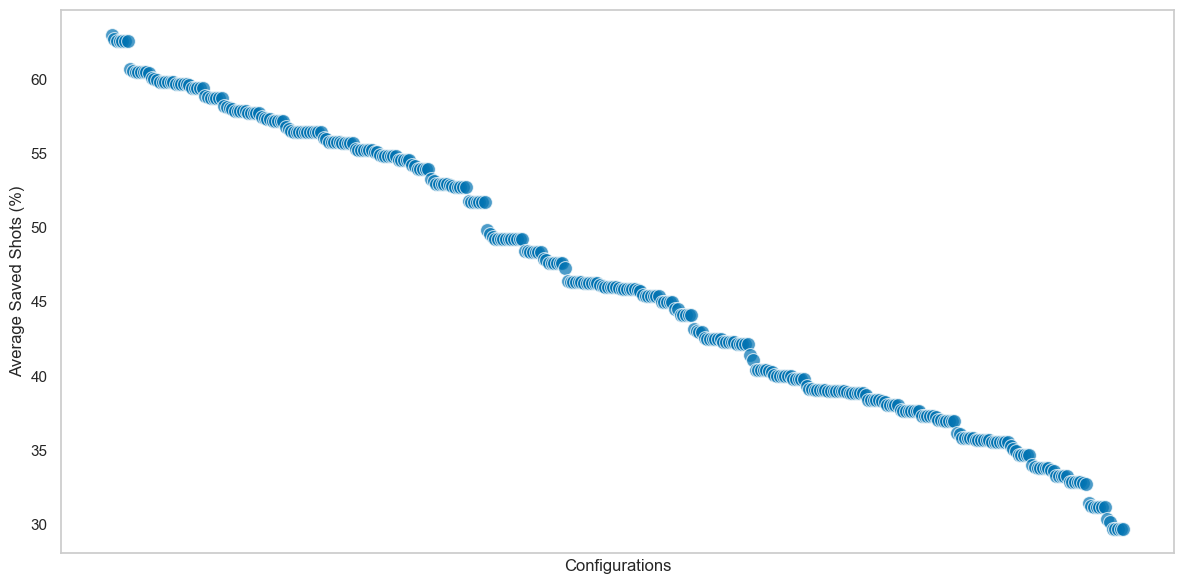

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort data
_data_sorted = _valid_grouped_val_set_aggregated.sort_values(
    by="shots_incremental",
    ascending=False
).reset_index(drop=True)

_data_sorted["shots_incremental%"] = _data_sorted["shots_incremental"] / 20_000 * 100

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=_data_sorted,
    x='conf',
    y='shots_incremental%',
    s=100,
    alpha=0.7
)

# Customize appearance
plt.xlabel('')
plt.xticks([])  # Remove x-axis labels
plt.ylabel('Average Saved Shots (%)')
plt.xlabel('Configurations')
# plt.title('Average Saved Shots by Configuration')
# plt.legend(title='Valid', loc='upper right')
sns.set_style("white")  # White background
plt.grid(False)  # Remove grid lines
plt.tight_layout()
plt.show()

In [124]:
metrics = ["shots_incremental", "shots_aposteriori", "incremental_distance_full", "aposteriori_distance_full", "incremental_aposteriori_shots_diff", "incremental_aposteriori_distance_full_diff", "incremental_aposteriori_shots_diff_norm", "incremental_aposteriori_distance_full_diff_norm"
]

In [125]:
test_set_filtered = test_set[test_set['conf'].isin(_valid_grouped_val_set['conf'])].reset_index(drop=True)
test_set_grouped = test_set_filtered.groupby("conf").agg({
    k: aggregator for k in metrics if k != "valid"
}).reset_index()
test_set_grouped["valid"] = test_set_filtered.groupby("conf")["valid"].mean().reset_index(drop=True)
test_set_grouped


,conf,shots_incremental,shots_aposteriori,incremental_distance_full,aposteriori_distance_full,incremental_aposteriori_shots_diff,incremental_aposteriori_distance_full_diff,incremental_aposteriori_shots_diff_norm,incremental_aposteriori_distance_full_diff_norm,valid


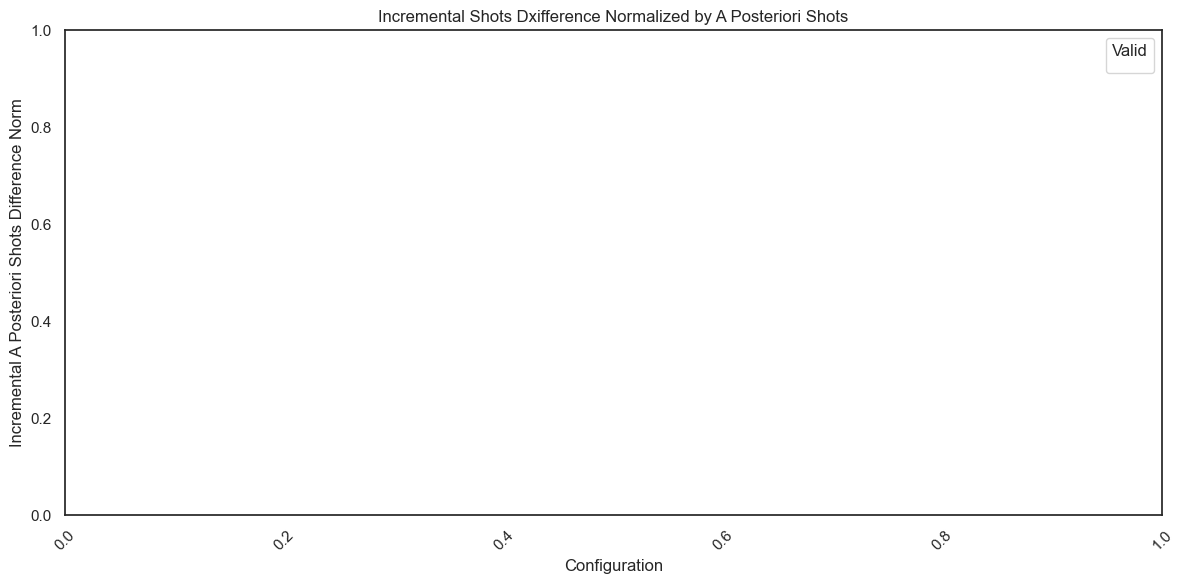

In [126]:
# boxplot of shots_incremental - shots_aposteriori for each configuration

plt.figure(figsize=(12, 6))
sns.boxplot(data=test_set_filtered, x='conf', y='incremental_aposteriori_shots_diff', hue='valid', showfliers=False)
plt.xticks(rotation=45)
plt.title('Incremental Shots Dxifference Normalized by A Posteriori Shots')
plt.xlabel('Configuration')
plt.ylabel('Incremental A Posteriori Shots Difference Norm')
plt.legend(title='Valid', loc='upper right')
plt.tight_layout()
plt.show()

In [127]:
configs = unique_configs[unique_configs['conf'].isin(_valid_grouped_val_set['conf'])]

if first_confs is not None:
    configs = configs.head(first_confs).reset_index(drop=True)
    

for _, row in configs.iterrows():
    print(f"Configuration {row['conf']}:")
    for col in configurations_columns:
        print(f"  {col}: {row[col]}")
    print("\n")

Configuration conf_9:
  default_shots: 50
  next_shots_type: constant
  threshold: 0.025
  stopping_criterion_type: delta
  stopping_dist_func: tvd
  stability_type: constant
  stability_k: 1
  aposteriori_alpha: 0.3
  constant_next_shots_val: 250.0
  dma_offset: nan
  dma_window: nan
  dma_alpha: nan
  dc_offset: 2.0
  qc_offset: nan
  qc_window: nan
  qc_quorum_ratio: nan
  min_initial_iterations: nan
  delta_threshold: 0.3


Configuration conf_14:
  default_shots: 50
  next_shots_type: constant
  threshold: 0.025
  stopping_criterion_type: delta
  stopping_dist_func: tvd
  stability_type: constant
  stability_k: 3
  aposteriori_alpha: 0.3
  constant_next_shots_val: 250.0
  dma_offset: nan
  dma_window: nan
  dma_alpha: nan
  dc_offset: 2.0
  qc_offset: nan
  qc_window: nan
  qc_quorum_ratio: nan
  min_initial_iterations: nan
  delta_threshold: 0.3


Configuration conf_15:
  default_shots: 50
  next_shots_type: constant
  threshold: 0.025
  stopping_criterion_type: delta
  stopping_d